In [1]:
import pandas as pd

In [2]:
# pandas 读取数据
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/testA.csv')

In [3]:
print(train.shape) #(800000, 47)
print(test.shape) #(200000, 46)

(800000, 47)
(200000, 46)


In [4]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


### 分类指标计算测试

In [6]:
## 混淆矩阵
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
y_pred = np.array([0, 1, 0, 1])
y_true = np.array([0, 1, 1, 0])
print('混淆矩阵:\n',confusion_matrix(y_true, y_pred))

混淆矩阵:
 [[1 1]
 [1 1]]


In [7]:
## accuracy
print("ACC", accuracy_score(y_true,y_pred)) # 0.5

ACC 0.5


In [8]:
## Precision,Recall,F1-score
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision',metrics.precision_score(y_true, y_pred))
print('Recall',metrics.recall_score(y_true, y_pred))
print('F1-score:',metrics.f1_score(y_true, y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


P-R曲线


(3,)
[1.         0.83333333 0.        ]
[0 1]


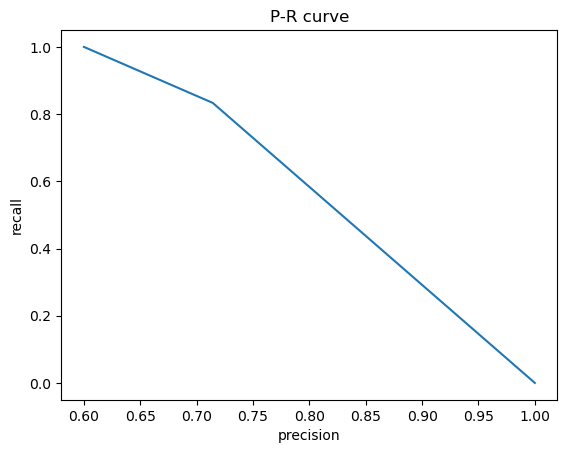

In [13]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
print(precision.shape)
print(recall)
print(thresholds)
plt.title("P-R curve")
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

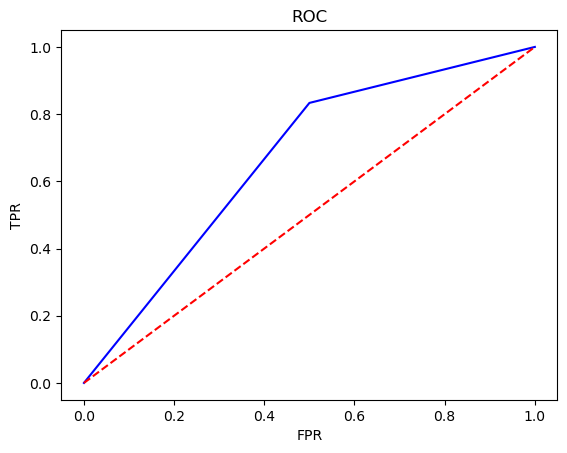

In [14]:
## ROC曲线
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
plt.title('ROC')
plt.plot(FPR, TPR,'b')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')

AUC


In [15]:
## AUC
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [16]:
## KS值 在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
FPR,TPR,thresholds=roc_curve(y_true, y_pred)
KS=abs(FPR-TPR).max()
print('KS值：',KS)

KS值： 0.5238095238095237
